# Example of adaptive Lasso

Author: Alexandre Gramfort

Adaptive lasso consists in computing many Lasso with feature
reweighting. It's also known as iterated L1.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import Lasso

data = fetch_mldata("leukemia")
X = data.data.astype(float)
y = data.target.astype(float)
X /= np.sum(X ** 2, axis=0)  # scale features

In [12]:
if True:  # g(x) = sqrt(abs(x))
    g = lambda w: np.sqrt(np.abs(w))
    gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)
else: # g(x) = log(eps + abs(x))
    eps = 0.01
    g = lambda w: np.log(eps + np.abs(w))
    gprime = lambda w: 1. / (eps + np.abs(w))

n_samples, n_features = X.shape
p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y - np.dot(X, w)) ** 2) \
                  + alpha * np.sum(g(w))

weights = np.ones(n_features)
n_lasso_iterations = 20
alpha = 0.001

objective = []
for k in range(n_lasso_iterations):
    X_w = X / weights[np.newaxis, :]
    clf = Lasso(alpha=alpha, fit_intercept=False)
    clf.fit(X_w, y)
    coef_ = clf.coef_ / weights
    weights = gprime(coef_)
    objective.append(p_obj(coef_))
    print('Sparsity: %1.3f %%- Objective: %.5f' % (100. * np.mean(coef_ != 0.0), objective[-1]))

Sparsity: 0.463 %- Objective: 0.11338
Sparsity: 0.295 %- Objective: 0.10110
Sparsity: 0.267 %- Objective: 0.09868
Sparsity: 0.210 %- Objective: 0.09573
Sparsity: 0.182 %- Objective: 0.09454
Sparsity: 0.182 %- Objective: 0.09453
Sparsity: 0.182 %- Objective: 0.09452
Sparsity: 0.182 %- Objective: 0.09452
Sparsity: 0.182 %- Objective: 0.09452
Sparsity: 0.182 %- Objective: 0.09451
Sparsity: 0.182 %- Objective: 0.09451
Sparsity: 0.182 %- Objective: 0.09451
Sparsity: 0.182 %- Objective: 0.09450
Sparsity: 0.182 %- Objective: 0.09448
Sparsity: 0.182 %- Objective: 0.09433
Sparsity: 0.168 %- Objective: 0.09384
Sparsity: 0.168 %- Objective: 0.09384
Sparsity: 0.168 %- Objective: 0.09384
Sparsity: 0.168 %- Objective: 0.09384
Sparsity: 0.168 %- Objective: 0.09384


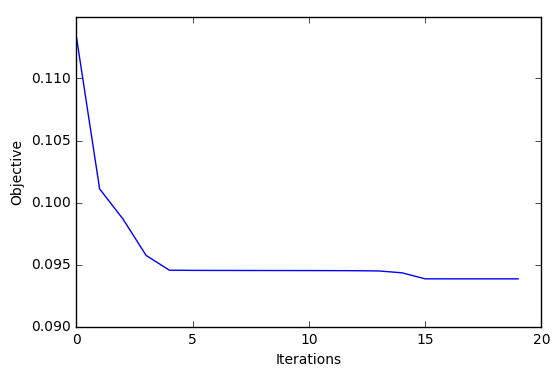

In [13]:
plt.plot(objective)
plt.xlabel('Iterations')
plt.ylabel('Objective');